In [7]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import cv2 

60


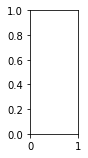

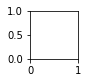

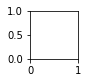

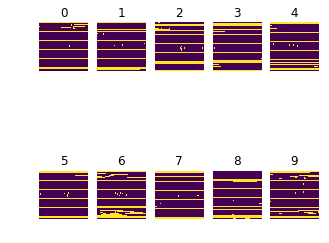

In [12]:
test_img_paths = [img_path for img_path in glob.glob("../../gds_image_clips/drive-download-20171016T045654Z-001/image_clips_MX_Benchmark1/image_clips/HST1_*.png")]
plt.figure(figsize=(15, 15))

num_imgs = len(test_img_paths)
print(num_imgs)
#print(test_img_paths[1].shape)

test_img=np.uint8(np.zeros((num_imgs,4800,4800)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    test_img[i]=img



(60, 4800, 4800)


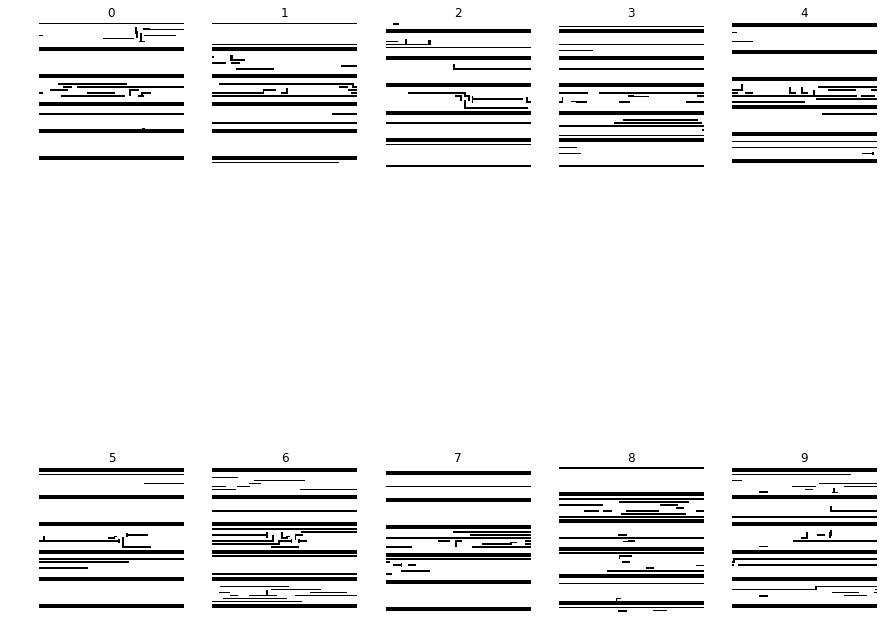

In [15]:
plt.figure(figsize=(15, 15))
print(test_img.shape)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

(60, 1200, 1200)


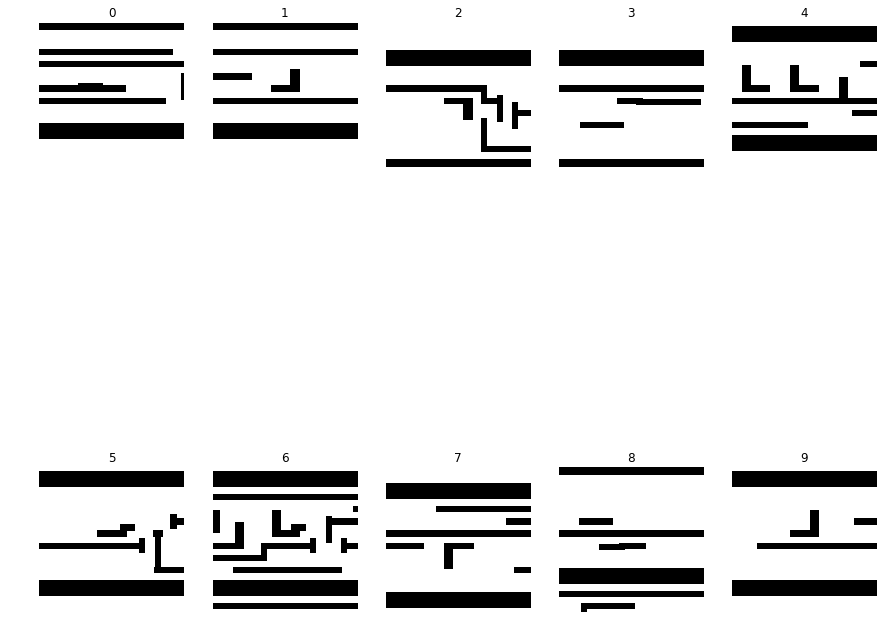

In [16]:
crop_img_list = np.uint8(np.zeros((num_imgs,1200,1200)))

for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    crop_img = img[1800:3000, 1800:3000]
    crop_img_list[i]=crop_img

plt.figure(figsize=(15, 15))
print(crop_img_list.shape)


for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(crop_img_list[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

255
0


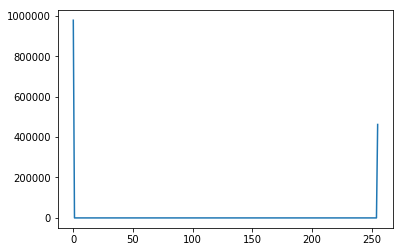

In [23]:
# Plot the image histogram to confirm that there are pixels with 0(black) and 255(white) values
print(crop_img_list[0].max())
print(crop_img_list[0].min())
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist = cv2.calcHist([crop_img_list[0]],[0],None,[256],[0,256])
plt.plot(hist)
#plt.hist(crop_img_list[0].ravel(),256,[0,256])
plt.show()